# Decision Tree
Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not; Marital.Status : marital status of a person; Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government ; Work Experience : Work experience of an individual person; Urban : Whether that person belongs to urban area or not

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
fc=pd.read_csv("Fraud_check.csv")

In [ ]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fc.shape

(600, 6)

In [ ]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fc.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

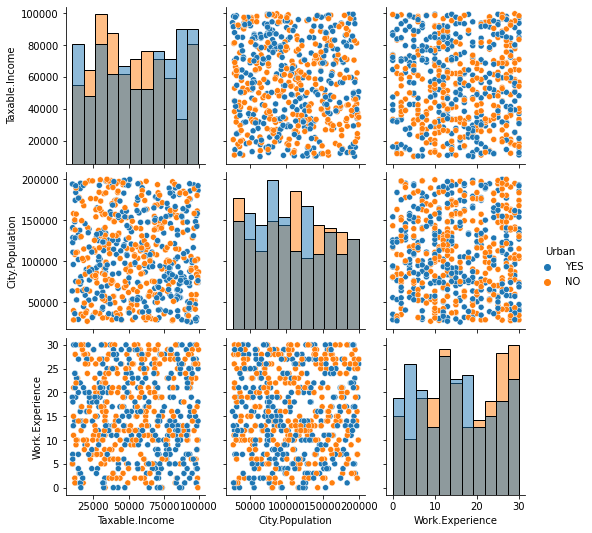

In [ ]:
sns.pairplot(data=fc, hue="Urban", diag_kind="hist")
plt.show()

In [ ]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
category= [var for var in fc.columns if fc[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n', category)

There are 3 categorical variables

The categorical variables are as follows :

 ['Undergrad', 'Marital.Status', 'Urban']


In [ ]:
numerical = [var for var in fc.columns if fc[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['Taxable.Income', 'City.Population', 'Work.Experience']


In [ ]:
for var in category:   
    print(var, 'has ', len(fc[var].unique()), ' labels')

Undergrad has  2  labels
Marital.Status has  3  labels
Urban has  2  labels


In [ ]:
fc[fc.duplicated()].shape

(0, 6)

In [ ]:
fc["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [ ]:
fc['Taxable.Income'] = pd.cut(fc['Taxable.Income'], bins=[0,30000,99620], labels=['risky', 'good'])

In [ ]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [ ]:
fc = fc.rename(columns={'Taxable.Income': 'Taxinc',
                        'Marital.Status': 'marital',
                         'City.Population': 'population',
                         'Work.Experience' :'Experience'})

In [ ]:
fc['Taxinc']=fc['Taxinc'].map({'risky':0,'good':1})

In [ ]:
fc.head()

,Undergrad,marital,Taxinc,population,Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [ ]:
label_encoder = preprocessing.LabelEncoder()

fc['Urban']= label_encoder.fit_transform(fc['Urban'])
fc['Undergrad']= label_encoder.fit_transform(fc['Undergrad'])
fc['marital']= label_encoder.fit_transform(fc['marital'])
fc['Taxinc']=label_encoder.fit_transform(fc['Taxinc'])

In [ ]:
fc.head()

,Undergrad,marital,Taxinc,population,Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm = norm_func(fc)
df_norm.tail(10)

,Undergrad,marital,Taxinc,population,Experience,Urban
590,0.0,0.5,1.0,0.341473,0.466667,1.0
591,1.0,1.0,0.0,0.615406,0.600000,1.0
592,1.0,1.0,1.0,0.283703,0.533333,0.0
593,0.0,0.0,1.0,0.610256,0.333333,1.0
594,0.0,0.5,1.0,0.412341,0.300000,1.0
595,1.0,0.0,1.0,0.078811,0.233333,1.0
596,1.0,0.0,1.0,0.170058,0.066667,1.0
597,0.0,0.0,1.0,0.737240,0.000000,1.0
598,1.0,0.5,1.0,0.886810,0.566667,0.0
599,0.0,0.0,1.0,0.760683,0.533333,0.0


In [ ]:
x=fc.iloc[:,:-1]
y=fc['Taxinc']

In [ ]:
x

,Undergrad,marital,Taxinc,population,Experience
0,0,2,1,50047,10
1,1,0,1,134075,18
2,0,1,1,160205,30
3,1,2,1,193264,15
4,0,1,1,27533,28
...,...,...,...,...,...
595,1,0,1,39492,7
596,1,0,1,55369,2
597,0,0,1,154058,0
598,1,1,1,180083,17


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxinc, Length: 600, dtype: int64

In [ ]:
df_norm.Taxinc.value_counts()

1.0    476
0.0    124
Name: Taxinc, dtype: int64

In [ ]:
colnames = list(fc.columns)
colnames

['Undergrad', 'marital', 'Taxinc', 'population', 'Experience', 'Urban']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

# Decision Tree Classifier using Entropy Criteria

In [ ]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

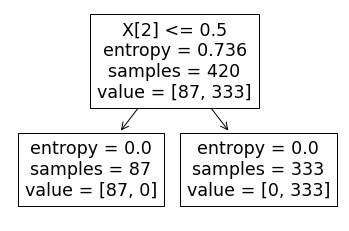

In [ ]:
tree.plot_tree(model1)
plt.show()

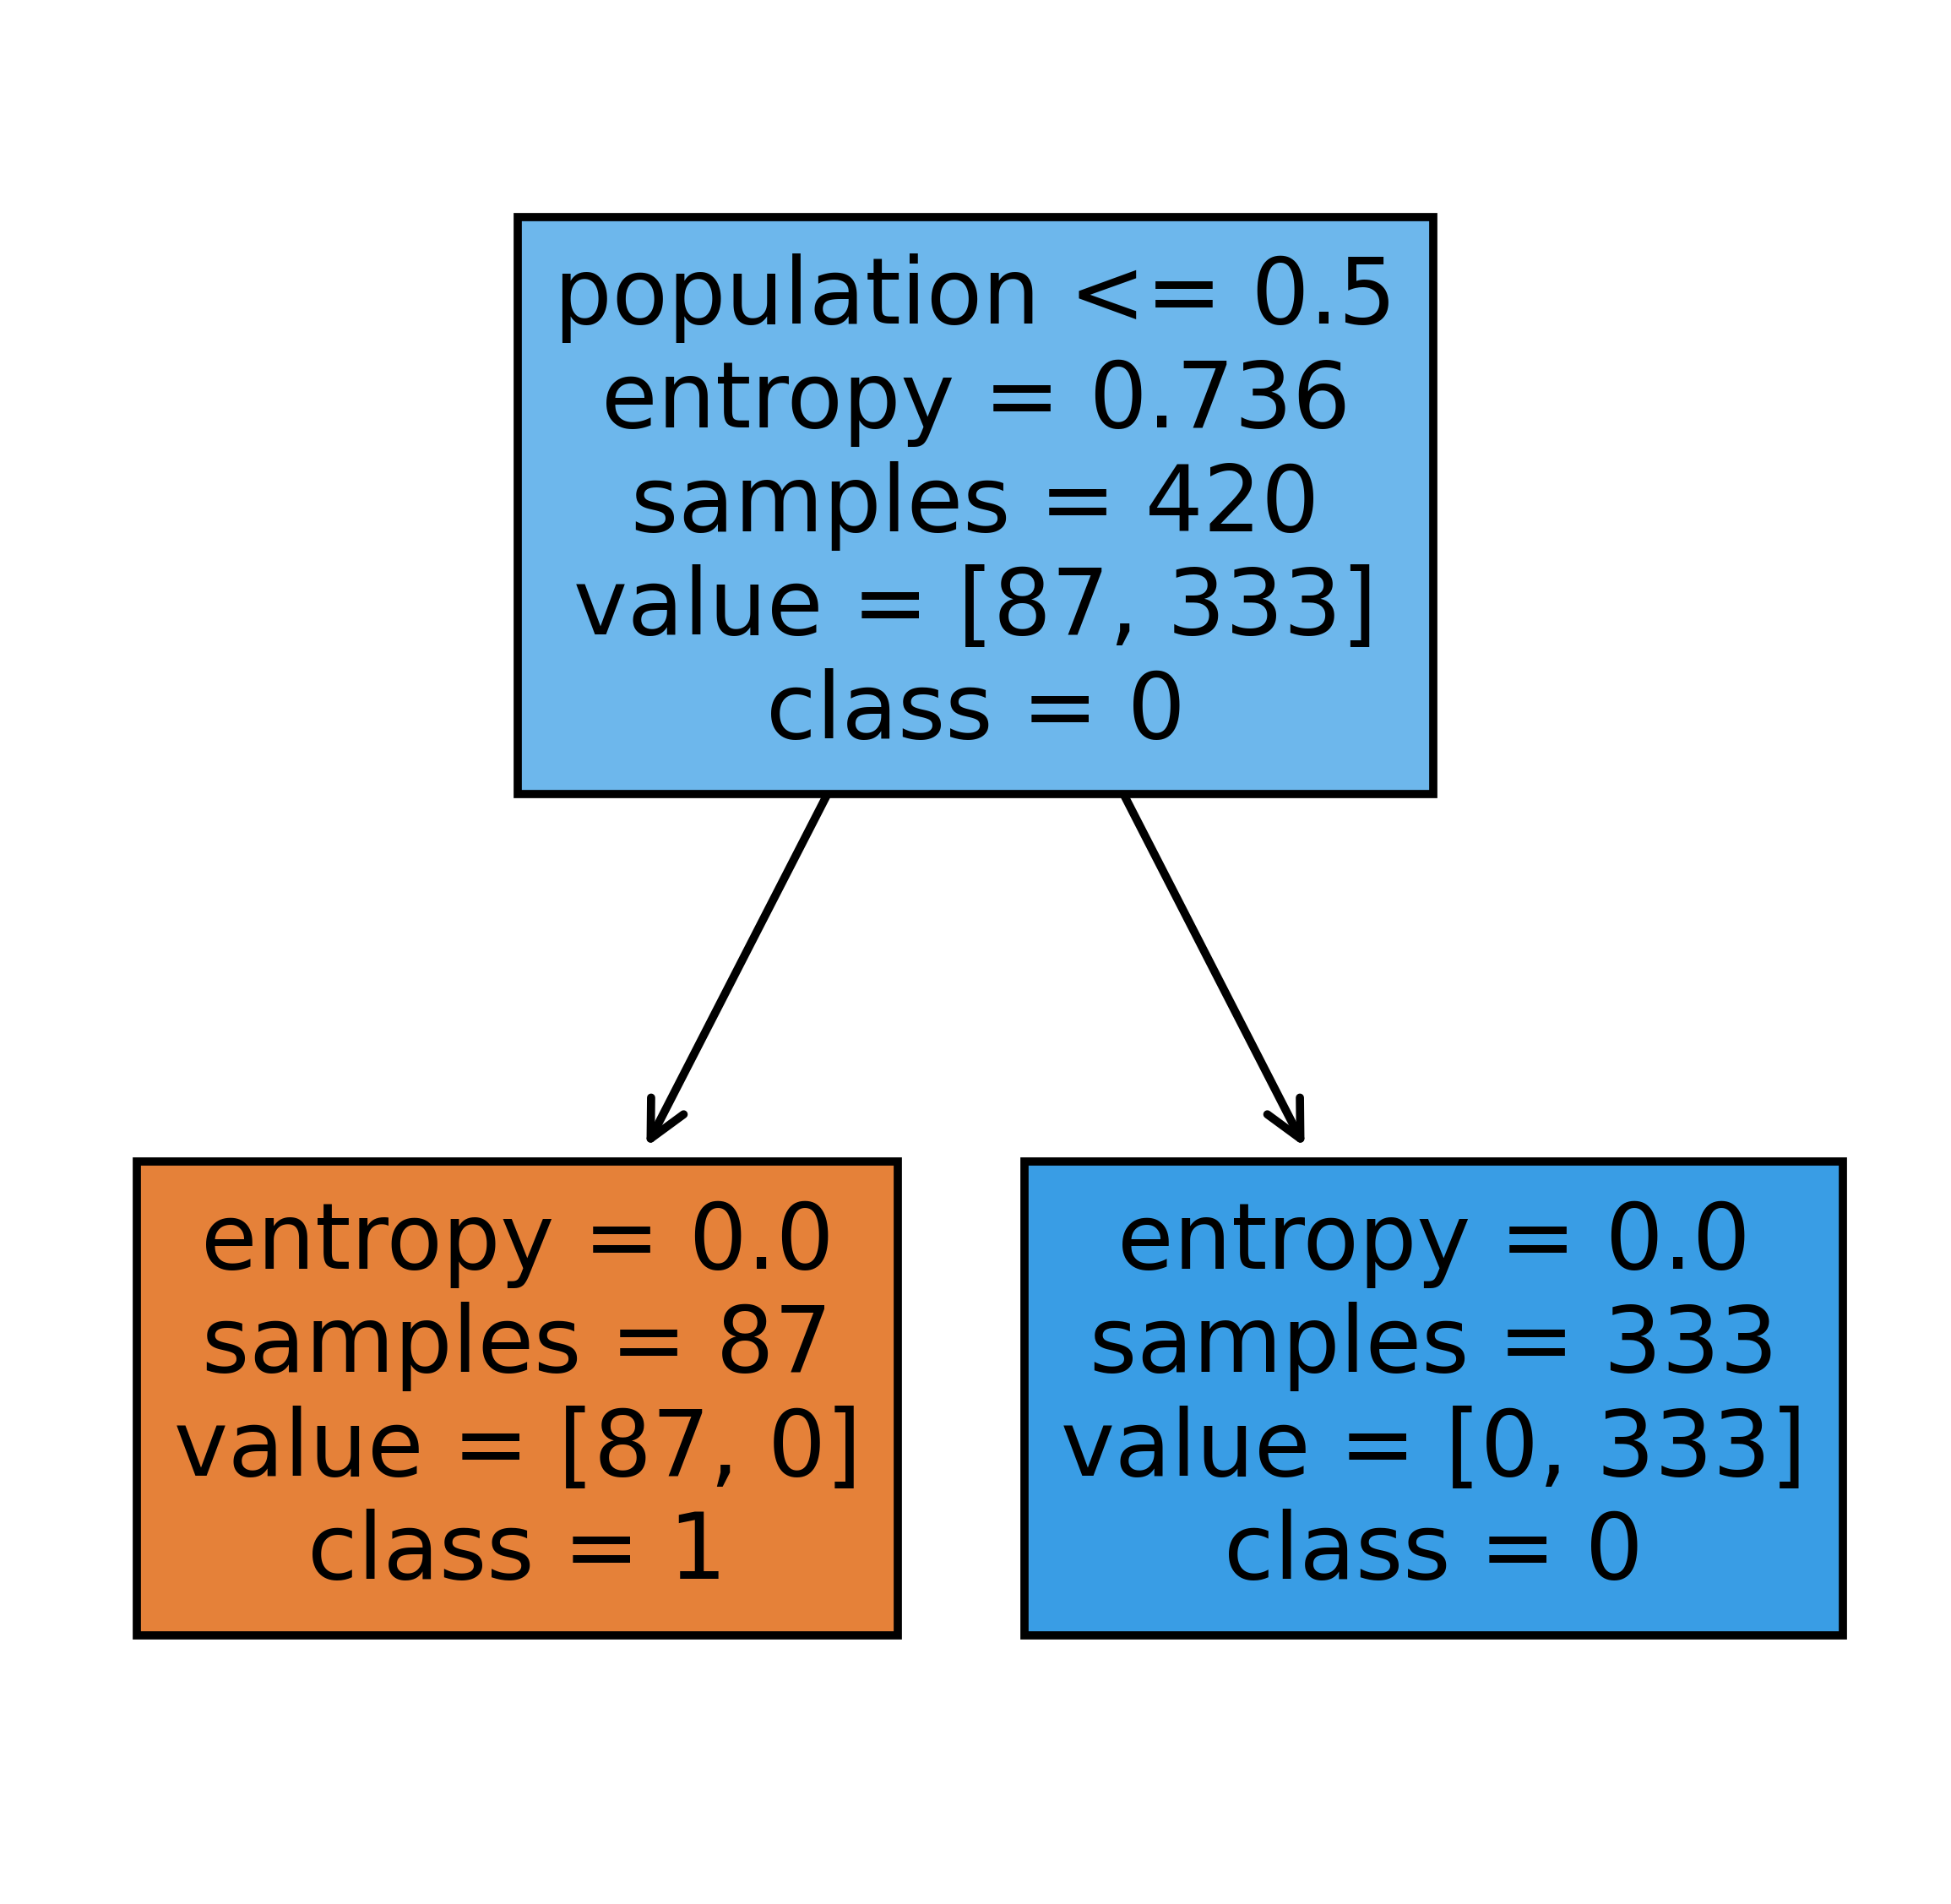

In [ ]:
fn=['Undergrad', 'marital', 'population', 'Experience', 'Urban']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) 
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [ ]:
preds1 = model1.predict(x_test) 
pd.Series(preds1).value_counts()

1    143
0     37
dtype: int64

In [ ]:
preds1

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [ ]:
pd.crosstab(y_test,preds1)

col_0,0,1
Taxinc,,
0,37,0
1,0,143


In [ ]:
np.mean(preds1==y_test)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds1)

1.0

# Finding the best hyper-parameter for the decision tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
param_grid = {'criterion' : ['entropy','gini'],
              'max_depth': [2,3,4,5,6,7,8,9,10],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

In [ ]:
grid_search = GridSearchCV(dt, param_grid, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
model_best = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,min_samples_split=2,min_samples_leaf=10)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10)

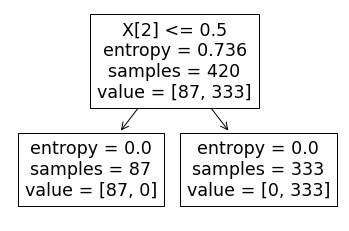

In [ ]:
tree.plot_tree(model_best);
plt.show()

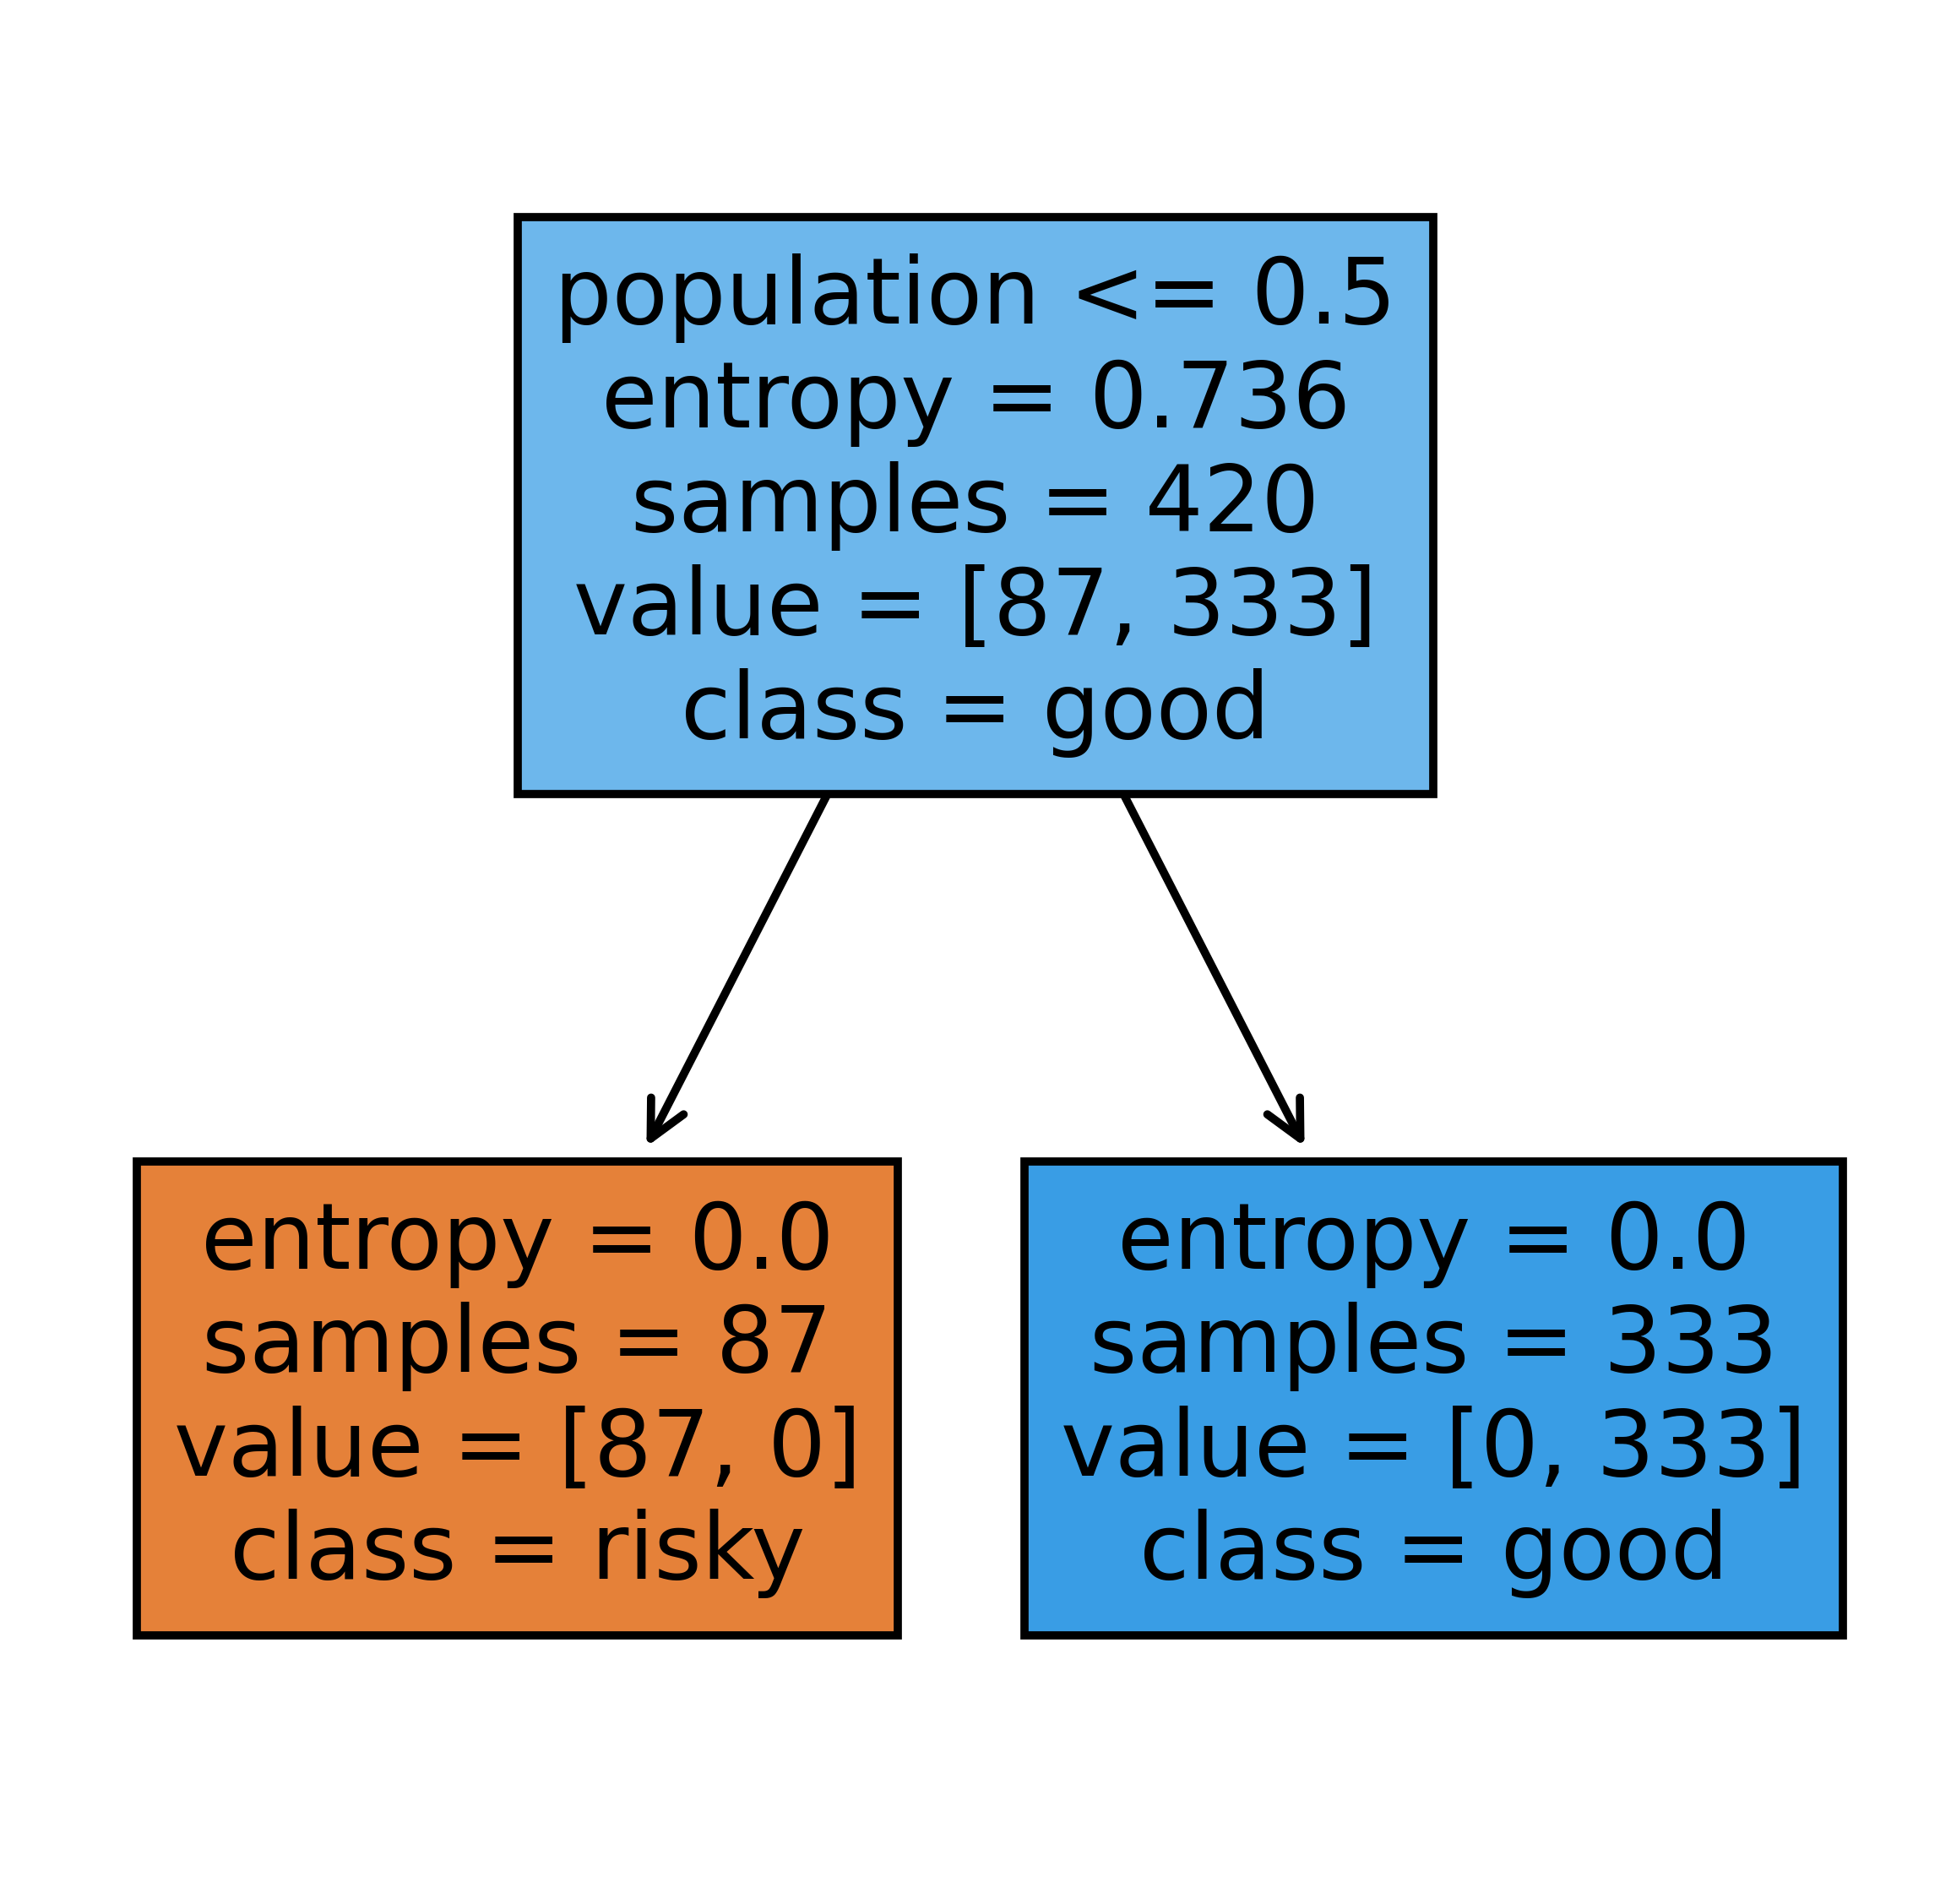

In [ ]:
fn=['Undergrad', 'marital', 'population', 'Experience', 'Urban']
cn=['risky','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) # dpi is the pixel size
tree.plot_tree(model_best,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [ ]:
preds_best = model_best.predict(x_test) 
pd.Series(preds_best).value_counts()

1    143
0     37
dtype: int64

In [ ]:
preds_best

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [ ]:
pd.crosstab(y_test,preds_best)

col_0,0,1
Taxinc,,
0,37,0
1,0,143


In [ ]:
print("the accuracy of the model =",accuracy_score(y_test,preds_best)*100)

the accuracy of the model = 100.0
